In [8]:
%load_ext autoreload
%autoreload 2

# Create bed files of peaks set

In [8]:
import pickle

with open('../results/background_GC_matched.pkl', 'rb') as file:
    peaks = pickle.load(file) 

In [29]:
(84505813 + 515) + 4096/2

84508376.0

In [9]:
peaks

,chr,start,end,sequence
GC_cont,,,,
1:14154-15100,X,153066000,153070096,TGCCCCACCAACGCTCCTCCAGAGGGACTTGACTTCAATGAGTTGA...
1:15698-16677,14,105454000,105458096,CGCTGTAGGCTCCTCCCAGGCATGGCCGGGAGCTGTGGGGGCTCCT...
1:17116-17963,10,79848000,79852096,CTGCCTCCTCCAGCCACACCGAGGCTTGAACCTCGAGGACCCCCGG...
1:28903-29812,7,158174000,158178096,CCGAGGTGACATACATCCTCAGCTTATGAAGATGATGGGATTAAGA...
1:180637-181553,11,6454000,6458096,CAAGAGGAGGACTGCTATAGAAGTAGCAGGTGTTTGGAAGAGAGTG...
...,...,...,...,...
Y:56724332-56725266,1,122534000,122538096,TTTTTTTCATGTAAGGCTAGACAGAAGAATTCTCAGTAACTTCCTT...
Y:56727619-56728608,4,87346000,87350096,GACCAGTATCTCTTAGGAATATAGATGCAAAAATTCTCAACAAAAG...
Y:56763067-56763979,1,116528000,116532096,AATCCTCCCGTCTTGGCCTCACAAAGTGTTGGGATTATAGGCATAA...


In [10]:
peaks.iloc[:,0:3].to_csv('../results/background.bed', header=False, index=False, sep='\t')

# Create bed file of peaks with flanking regions

In [33]:
import pickle

with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file) 

In [34]:
len_seq = 4096
peaks.start = peaks.middle_peak - int(len_seq/2)
peaks.end = peaks.middle_peak + int(len_seq/2)

peaks

,chr,start,end,middle_peak,sequence,GC_cont
peakID,,,,,,
1:14154-15100,1,12579,16675,14627,GCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAGGTGTGTGGTGATG...,0.585938
1:15698-16677,1,14140,18236,16188,GGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTG...,0.599854
1:17116-17963,1,15492,19588,17540,GGCTGACCATTGCCTTGGACCGCTCTTGGCAGTCGAAGAAGATTCT...,0.597168
1:28903-29812,1,27310,31406,29358,CACATGCAGCCACTGAGCACTTGAAATGTGGATAGTCTGAATTGAG...,0.489746
1:180637-181553,1,179047,183143,181095,ATGCTGATGGATTGTCAGCTTCCCAGATGTGCAAGAATCTCTCCTC...,0.537109
...,...,...,...,...,...,...
Y:56724332-56725266,Y,56722751,56726847,56724799,ACGGAATGGAATGGAATCCAAAGGAATGGAATAGAATGGAATGGAA...,0.389404
Y:56727619-56728608,Y,56726066,56730162,56728114,TGGAATGCACTCGAATGCAATGGAGTCGAAACAAATGGACTGGAAT...,0.391602
Y:56763067-56763979,Y,56761475,56765571,56763523,TGGAAGGGAGTGTAATGCAAGGTTCTCGAAAATAATGGAATCGAAT...,0.393555


In [35]:
peaks.iloc[:,0:3].to_csv('../results/peaks_flanking.bed', header=False, index=False, sep='\t')

In [36]:
import subprocess
import pandas as pd

sort_bed = "sortBed -i  ../results/peaks_flanking.bed  > ../results/peaks_sorted.bed"
subprocess.run(sort_bed, shell=True)

CompletedProcess(args='sortBed -i  ../results/peaks_flanking.bed  > ../results/peaks_sorted.bed', returncode=0)

In [37]:
merge_bedtools = "bedtools merge -i ../results/peaks_sorted.bed -c 1 -o count > ../results/count_peaks.bed"
subprocess.run(merge_bedtools, shell=True)

peaks = pd.read_csv("../results/count_peaks.bed" ,header=None, sep='\t', low_memory=False)
peaks

,0,1,2,3
0,1,12579,19588,3
1,1,27310,31406,1
2,1,179047,188704,3
3,1,189440,193536,1
4,1,197068,201164,1
...,...,...,...,...
163665,Y,56705025,56709121,1
163666,Y,56722751,56730162,2
163667,Y,56761475,56765571,1
163668,Y,56827523,56831619,1


<Axes: >

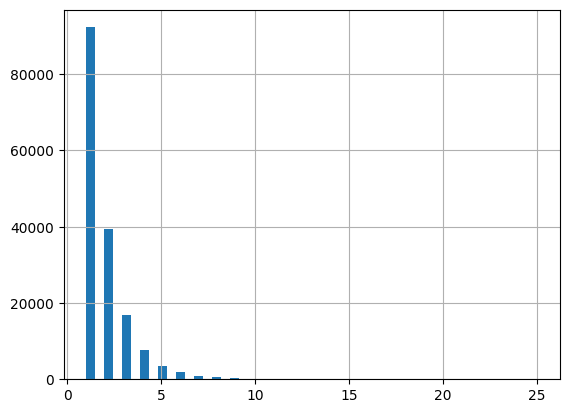

In [41]:
peaks.iloc[:,3].hist(bins=50)

# Check file from cluster

In [3]:
import pickle

with open('../results/ATAC_backgroundt.pkl', 'rb') as file:
    tracks = pickle.load(file)

with open('../results/ATAC_peakst.pkl', 'rb') as file:
    tracks_p = pickle.load(file)

In [4]:
tracks

,0,pseudo_bulk
X:153066000-153070096,"[0.049471779809195926, 0.048954653190981336, 0...",D8Somite
14:105454000-105458096,"[0.47058522257527835, 0.4698957204176589, 0.46...",D8Somite
10:79848000-79852096,"[0.04981653088800565, 0.04929940426979106, 0.0...",D8Somite
7:158174000-158178096,"[0.4693785937994443, 0.4686890916418248, 0.467...",D8Somite
11:6454000-6458096,"[1.0599371918005078, 1.0580410608670545, 1.055...",D8Somite
...,...,...
1:122534000-122538096,"[0.2758196574132297, 0.2758196574132297, 0.275...",D20Myoblast
4:87346000-87350096,"[1.2549794412301953, 1.2494630480819306, 1.243...",D20Myoblast
1:116528000-116532096,"[3.9249137249902595, 3.9387047078609205, 3.952...",D20Myoblast
11:71156000-71160096,"[0.06895491435330743, 0.07171311092743973, 0.0...",D20Myoblast


In [10]:
import numpy as np

len(np.unique(tracks.index)), 578324/2

(289162, 289162.0)

In [5]:
tracks_p

,0,pseudo_bulk
peakID,,
1:14154-15100,"[0.10997559414030314, 0.110147969679708, 0.110...",D8Somite
1:15698-16677,"[4.436774008741791, 4.439704392911674, 4.44160...",D8Somite
1:17116-17963,"[2.824028462069885, 2.8107555455357103, 2.7974...",D8Somite
1:28903-29812,"[19.845595851681974, 19.932990250160245, 20.01...",D8Somite
1:180637-181553,"[0.5871110872129663, 0.5860768339765372, 0.585...",D8Somite
...,...,...
Y:56724332-56725266,"[16.435892988836667, 16.761923960206136, 17.08...",D22-15Myoblast
Y:56727619-56728608,"[0.5635912268899336, 0.5603145337103409, 0.557...",D22-15Myoblast
Y:56763067-56763979,"[8.770069295179693, 8.711088817947024, 8.65374...",D22-15Myoblast


# Test dataset class

In [24]:
from models.pytorch_datasets import BiasDataset

data_dir = "../results/"
chr_train = ['1','2','3','4','5','7','8','9','10','11','12','14','15','16','17','18','19','20','21','X','Y']

data = BiasDataset(data_dir + 'background_GC_matchedt.pkl', data_dir + 'ATAC_backgroundtest.pkl', chr_train)

In [15]:
data.ATAC_track.shape

torch.Size([4, 1025])

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data, batch_size=4,
                        shuffle=True, num_workers=0)

for i, batch in enumerate(train_dataloader):
    input, track = batch

    print(input.shape, track.shape)

torch.Size([4, 4, 4096]) torch.Size([4, 1025])


In [82]:
from models.pytorch_datasets import PeaksDataset

data_dir = "../results/"
chr_train = ['1','2','3','4','5','7','8','9','10','11','12','14','15','16','17','18','19','20','21','X','Y']
pseudo_bulk_order = ['D12Neuronal', 'D12Somite', 'D20Immature', 'D20Mesenchymal',
       'D20Myoblast', 'D20Myogenic', 'D20Neuroblast', 'D20Neuronal',
       'D20Somite', 'D8Mesenchymal', 'D8Myogenic', 'D8Neuronal', 'D8Somite']

data = PeaksDataset(data_dir + 'peaks_seqtest.pkl', data_dir + 'background_GC_matchedtest.pkl', 
                    data_dir + 'ATAC_peakstest.pkl', data_dir + 'ATAC_backgroundtest2.pkl', 
                    chr_train, pseudo_bulk_order, 100)

In [59]:
len(pseudo_bulk_order)

13

In [65]:
pseudo_bulk_order

['D12Neuronal',
 'D12Somite',
 'D20Immature',
 'D20Mesenchymal',
 'D20Myoblast',
 'D20Myogenic',
 'D20Neuroblast',
 'D20Neuronal',
 'D20Somite',
 'D8Mesenchymal',
 'D8Myogenic',
 'D8Neuronal',
 'D8Somite']

In [75]:
#Utils function to order the tracks always in the same order
def order_categories(categories, desired_order):
    category_index_map = {category: index for index, category in enumerate(desired_order)}
    indexes = [category_index_map.get(category) for category in categories]
    return indexes

cat = ['cat', 'dog', 'wouf', 'miaw', 'yo']
order = ['yo', 'dog', 'cat', 'miaw', 'wouf']

idx = order_categories(order, cat)

[4, 1, 0, 3, 2]

In [86]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data, batch_size=4,
                        shuffle=True, num_workers=0)

for i, batch in enumerate(train_dataloader):
    input, track = batch

    print(input.shape, track.shape)
    print(track[:,0,:].shape)

    break

torch.Size([4, 4, 4096]) torch.Size([4, 13, 1025])
torch.Size([4, 1025])


## Create small of background track to test

In [38]:
import pickle
with open('../results/background_GC_matched.pkl', 'rb') as file:
    sequences = pickle.load(file)   

with open('../results/ATAC_backgroundt.pkl', 'rb') as file:
    tracks = pickle.load(file)


In [39]:
sequences

,chr,start,end,sequence
GC_cont,,,,
1:14154-15100,X,153066000,153070096,TGCCCCACCAACGCTCCTCCAGAGGGACTTGACTTCAATGAGTTGA...
1:15698-16677,14,105454000,105458096,CGCTGTAGGCTCCTCCCAGGCATGGCCGGGAGCTGTGGGGGCTCCT...
1:17116-17963,10,79848000,79852096,CTGCCTCCTCCAGCCACACCGAGGCTTGAACCTCGAGGACCCCCGG...
1:28903-29812,7,158174000,158178096,CCGAGGTGACATACATCCTCAGCTTATGAAGATGATGGGATTAAGA...
1:180637-181553,11,6454000,6458096,CAAGAGGAGGACTGCTATAGAAGTAGCAGGTGTTTGGAAGAGAGTG...
...,...,...,...,...
Y:56724332-56725266,1,122534000,122538096,TTTTTTTCATGTAAGGCTAGACAGAAGAATTCTCAGTAACTTCCTT...
Y:56727619-56728608,4,87346000,87350096,GACCAGTATCTCTTAGGAATATAGATGCAAAAATTCTCAACAAAAG...
Y:56763067-56763979,1,116528000,116532096,AATCCTCCCGTCTTGGCCTCACAAAGTGTTGGGATTATAGGCATAA...


In [40]:
tracks

,0,pseudo_bulk
X:153066000-153070096,"[0.049471779809195926, 0.048954653190981336, 0...",D8Somite
14:105454000-105458096,"[0.47058522257527835, 0.4698957204176589, 0.46...",D8Somite
10:79848000-79852096,"[0.04981653088800565, 0.04929940426979106, 0.0...",D8Somite
7:158174000-158178096,"[0.4693785937994443, 0.4686890916418248, 0.467...",D8Somite
11:6454000-6458096,"[1.0599371918005078, 1.0580410608670545, 1.055...",D8Somite
...,...,...
1:122534000-122538096,"[0.2758196574132297, 0.2758196574132297, 0.275...",D20Myoblast
4:87346000-87350096,"[1.2549794412301953, 1.2494630480819306, 1.243...",D20Myoblast
1:116528000-116532096,"[3.9249137249902595, 3.9387047078609205, 3.952...",D20Myoblast
11:71156000-71160096,"[0.06895491435330743, 0.07171311092743973, 0.0...",D20Myoblast


In [41]:
sequences.index = sequences.chr + ":" + sequences.start.astype("str") + "-" + sequences.end.astype('str')

In [42]:
sequences = sequences.sample(100, replace=False)
tracks = tracks.loc[sequences.index]

sequences

,chr,start,end,sequence
X:127366000-127370096,X,127366000,127370096,CAATAGATGCAGAAAAAGCCTTTGACAAAATTCAACAACGCTTCAT...
17:28470000-28474096,17,28470000,28474096,AAATTTTGTGGCTGGGCACAGTGGCTCATGCCTATAATCCCAGCAC...
2:239634000-239638096,2,239634000,239638096,AGGAATCAGCACGCTGGGGCGCTGGGGAGGCAAGGAGATGGGCAGT...
1:37730000-37734096,1,37730000,37734096,GTACCCAATGAATGGAGACCATCAGCCCTTCTCCACTGACGGTCCC...
1:113314000-113318096,1,113314000,113318096,TAAGTAAAAACAAGAAAAAGTAAAACCGTGGGCAGACAAAGTTAAA...
...,...,...,...,...
14:105940000-105944096,14,105940000,105944096,GTGAGAGGGTCTGCGAGGGCTTCACCAGTCCTGGACCTGACTGCTG...
19:55964000-55968096,19,55964000,55968096,TTACATCATTACTAAGCAGTCAAATCTGGCTCTAGAATCAGTTCTC...
22:40286000-40290096,22,40286000,40290096,ATCATGCATACCAACAAAGTAGATATTTTTGCATGAAAAGCTTATT...
2:36034000-36038096,2,36034000,36038096,TTAGCTCCTCAAATCCTCCTGAGTCTTTCATTTCCTCTCTACATCA...


In [43]:
tracks

,0,pseudo_bulk
X:127366000-127370096,"[0.17996006313867788, 0.18082194083570222, 0.1...",D8Somite
X:127366000-127370096,"[0.8274589722396892, 0.8274589722396892, 0.827...",D20Myoblast
17:28470000-28474096,"[0.874978238019089, 0.8715307272309917, 0.8691...",D8Somite
17:28470000-28474096,"[2.418938395514025, 2.410663805791628, 2.40238...",D20Myoblast
2:239634000-239638096,"[0.10221869486708426, 0.10187394378827454, 0.1...",D8Somite
...,...,...
22:40286000-40290096,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",D20Myoblast
2:36034000-36038096,"[0.054298294912532116, 0.05412591937312725, 0....",D8Somite
2:36034000-36038096,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",D20Myoblast
6:87118000-87122096,"[0.3476814629796104, 0.34837096513722987, 0.34...",D8Somite


In [44]:
with open('../results/background_GC_matchedt.pkl', 'wb') as file:
    pickle.dump(sequences, file)

with open('../results/ATAC_backgroundtest.pkl', 'wb') as file:
    pickle.dump(tracks, file)

## Run training on very small subset

In [1]:
%load_ext autoreload
%autoreload 2

In [235]:
!python NN_test.py

cpu
Epoch [1/100], Loss: 0.3807, KLD: 0.3807, MSE: 50.6525
Epoch [1/100], Test loss: 0.4991, KLD: 0.4991, MSE: 48.4484, Spear corr: 0.0181, JSD: 1.0124
Epoch [2/100], Loss: 0.3635, KLD: 0.3635, MSE: 47.6349
Epoch [2/100], Test loss: 0.4979, KLD: 0.4979, MSE: 48.0631, Spear corr: -0.0906, JSD: 1.0117
Epoch [3/100], Loss: 0.3567, KLD: 0.3567, MSE: 49.4036
Epoch [3/100], Test loss: 0.4993, KLD: 0.4993, MSE: 51.3516, Spear corr: -0.0838, JSD: 1.0249
Epoch [4/100], Loss: 0.3177, KLD: 0.3177, MSE: 52.6862
Epoch [4/100], Test loss: 0.5163, KLD: 0.5163, MSE: 53.7474, Spear corr: -0.1654, JSD: 1.0929
Epoch [5/100], Loss: 0.2840, KLD: 0.2840, MSE: 53.0996
Epoch [5/100], Test loss: 0.5284, KLD: 0.5284, MSE: 52.8409, Spear corr: -0.1110, JSD: 1.1197
Epoch [6/100], Loss: 0.2559, KLD: 0.2559, MSE: 52.7254
Epoch [6/100], Test loss: 0.5384, KLD: 0.5384, MSE: 52.8740, Spear corr: 0.0363, JSD: 1.1546
Epoch [7/100], Loss: 0.2394, KLD: 0.2394, MSE: 52.5543
Epoch [7/100], Test loss: 0.5319, KLD: 0.5319, MS

In [226]:
!python peak_test.py

cpu
/Users/adorman/Documents/master-thesis/src/models/pytorch_datasets.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.sequences = pd.concat([self.sequences, pickle.load(file).sample(nb_back)])
Epoch [1/100], Loss: 3.9220, KLD: 3.9220, MSE: 758.9068
Epoch [2/100], Loss: 3.8398, KLD: 3.8398, MSE: 750.8217
Epoch [3/100], Loss: 3.8208, KLD: 3.8209, MSE: 749.9732
Epoch [4/100], Loss: 3.8012, KLD: 3.8012, MSE: 749.2938
Epoch [5/100], Loss: 3.7357, KLD: 3.7357, MSE: 749.4031
Epoch [6/100], Loss: 3.6231, KLD: 3.6231, MSE: 751.5516
Epoch [7/100], Loss: 3.4360, KLD: 3.4360, MSE: 758.1732
Epoch [8/100], Loss: 3.2744, KLD: 3.2744, MSE: 763.6208
Epoch [9/100], Loss: 3.1249, KLD: 3.1249, MSE: 763.5372
Epoch [10/100], Loss: 2.9726, KLD: 2.9726,

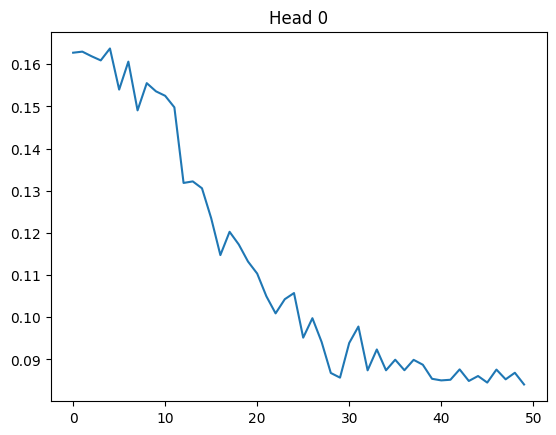

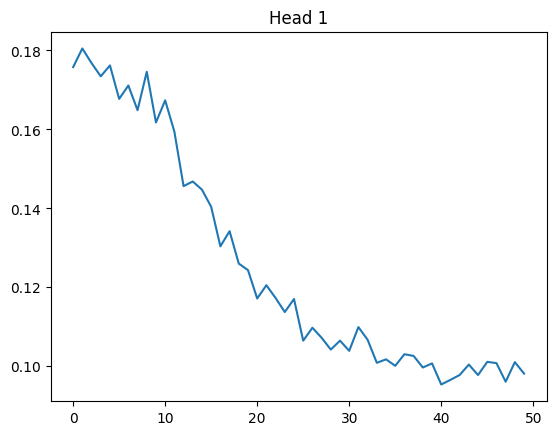

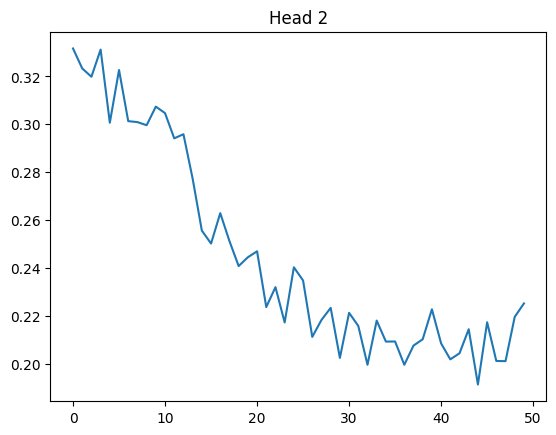

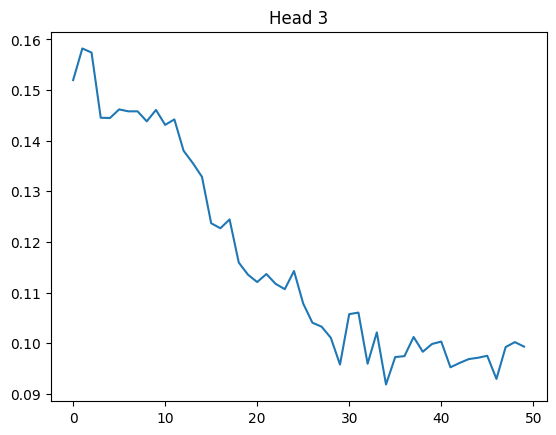

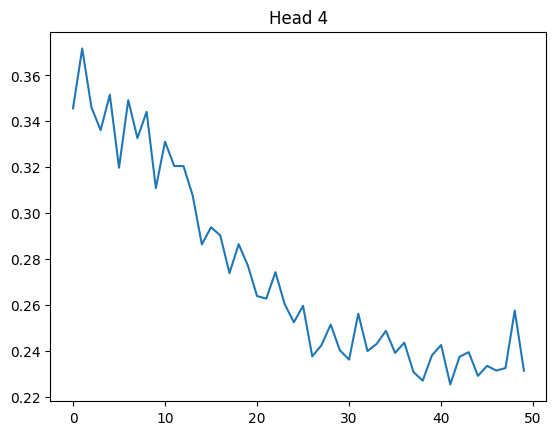

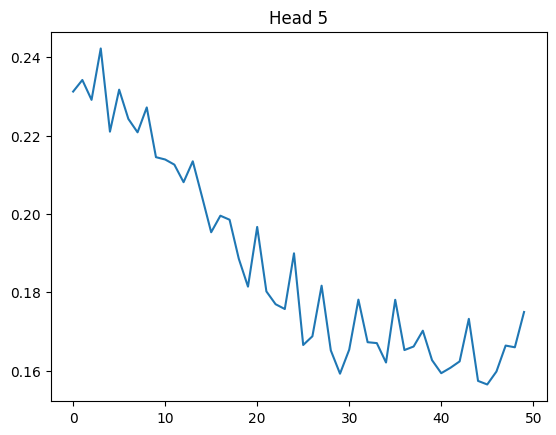

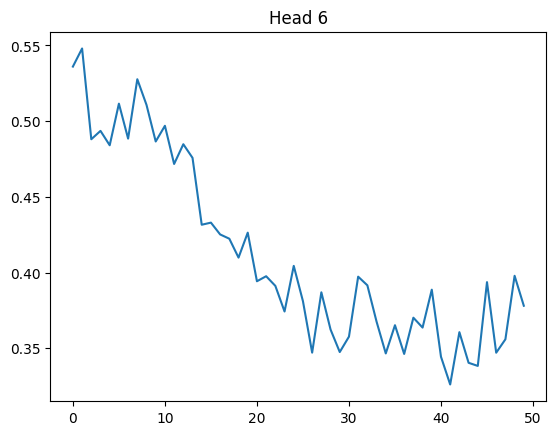

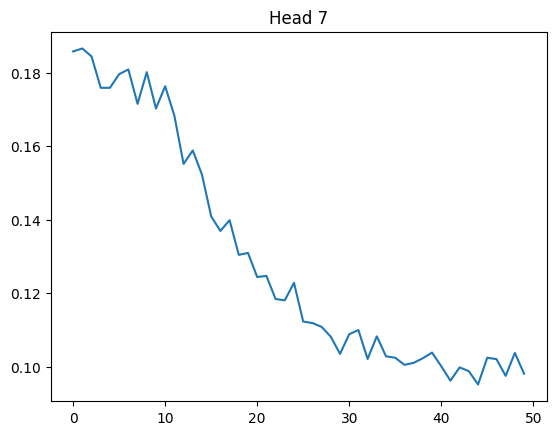

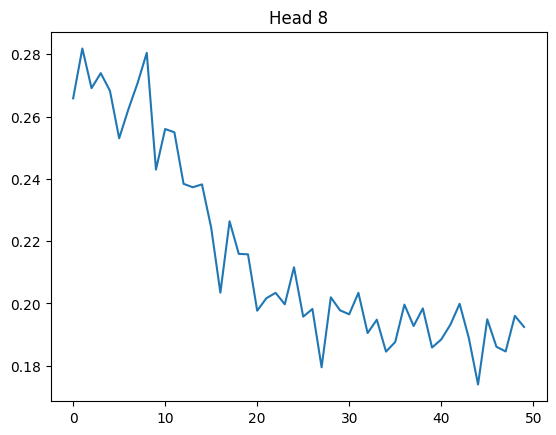

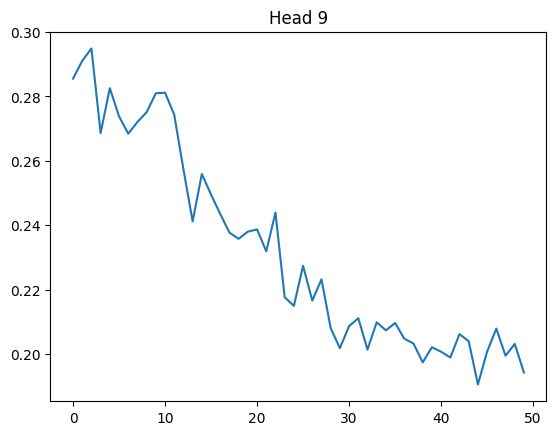

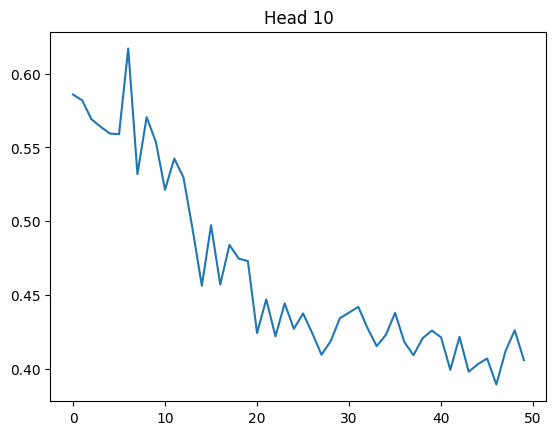

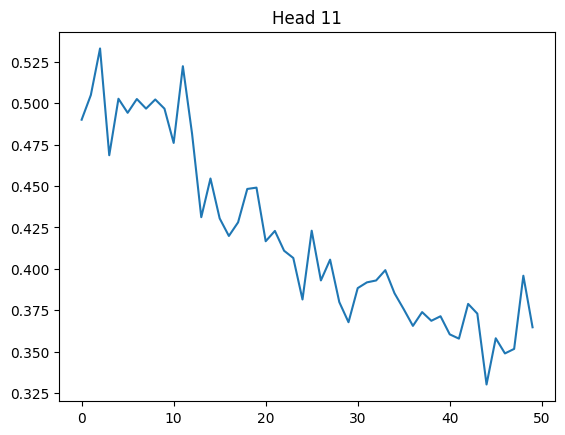

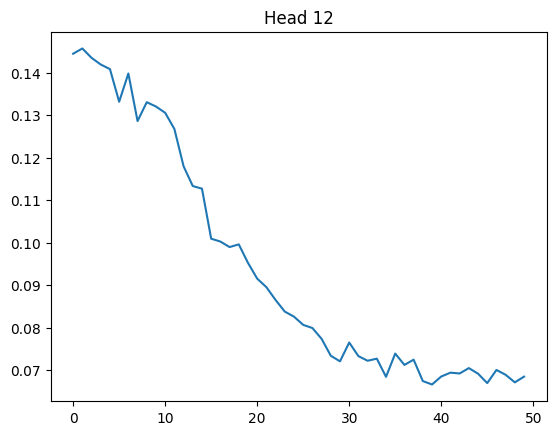

In [ ]:
import torch

with open('../results/peak_train_KLD_1e-3.pkl', 'rb') as file:
    loss = pickle.load(file)   

loss = torch.stack(loss, dim=1)
loss.shape

for i in range(0,loss.shape[0]):
    plt.plot(loss[i,:])
    plt.title("Head " + str(i))
    plt.show()


## Understand loss behaviour

In [41]:
import pickle
with open('../results/background_GC_matchedt.pkl', 'rb') as file:
    sequences = pickle.load(file)   

with open('../results/ATAC_backgroundt.pkl', 'rb') as file:
    tracks = pickle.load(file)

In [42]:
from data_processing.utils_data_preprocessing import one_hot_encode
import torch
import numpy as np

sequences = sequences.sequence
sequences = sequences.apply(lambda x: one_hot_encode(x))

idx = np.arange(0,70)
track = torch.Tensor(tracks.iloc[idx,0])
input = torch.from_numpy(np.stack(sequences[tracks.index[idx]].values))

input = torch.reshape(input, (-1,4,4096))
track = torch.reshape(track, (-1,1025)).type(torch.float32)

/var/folders/nx/fx90wvl146lcdkglfty5_wr4qnvn43/T/ipykernel_955/1445776227.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  track = torch.Tensor(tracks.iloc[idx,0])


In [43]:
input.shape, track.shape

(torch.Size([70, 4, 4096]), torch.Size([70, 1025]))

In [44]:
import torch
from models import BPNet

m = BPNet()
x, profile, count = m(input)

profile.shape

torch.Size([70, 1024])

In [48]:
from eval_metrics import ATACloss, profile_metrics, counts_metrics

criterion = ATACloss(weight_MSE=1)
loss = criterion(track, profile, count)
loss

(tensor(28.9016, grad_fn=<AddBackward0>),
 tensor(6.8414, grad_fn=<DivBackward1>),
 tensor(22.0602, grad_fn=<MseLossBackward0>))

## Understand validation metrics

In [30]:
profile_metrics(track, profile)

[1.066431545591313,
 1.0060653326400666,
 1.0136956916155455,
 1.0414672489755463,
 1.0218519837907556,
 1.0655539237247016,
 1.0130041749183782,
 1.033495119053954]

In [32]:
counts_metrics(track, count)

0.261904761904762

## Test the main model

In [17]:
import torch
from models import CATAC

m = CATAC(nb_pred=15, nb_cell_type_CN=4, nb_conv=8)
input = torch.randn(32, 4, 4096)
print(input.shape)
x, profile, count = m(input)

profile[10].shape

torch.Size([32, 4, 4096])


torch.Size([32, 1024])

## Test interpretation model with deeplift

In [80]:
from deeplift.dinuc_shuffle import dinuc_shuffle
import torch
import pandas as pd
import numpy
from data_processing.utils_data_preprocessing import one_hot_encode

import shap

def compute_shap_score(model ,seq, back):
    
    back = torch.reshape(back, (-1,4,len(seq)))
    seq = torch.reshape(torch.from_numpy(seq), (-1,4,len(seq)))
    explainer = shap.DeepExplainer(
        model, back)
    raw_scores = explainer.shap_values(seq)
    
    return np.squeeze(raw_scores)

def compute_importance_score(path_model, path_sequence, device):

    #Load the model and sequenece to predict
    model = torch.load(path_model)
    model.to(device)
    seq = pd.read_pickle(path_sequence).sequence.iloc[:5]

    #On-hot encode the sequences
    seq = seq.apply(lambda x: one_hot_encode(x))
    
    #Create shuffled sequences for background
    background = [dinuc_shuffle(s, num_shufs=20) for s in seq]

    #Compute importance score for each base of sequences
    shap_scores = [compute_shap_score(model,s,torch.from_numpy(background[i])) for i,s in enumerate(seq)]

    #Reshape the sequeneces an scores
    seq = np.stack(seq.to_numpy())
    seq = torch.reshape(torch.from_numpy(seq),(-1,4,seq.shape[1]))

    shap_scores = np.stack(shap_scores)

    print(seq.shape, shap_scores.shape)
    
    #Project the scores on the sequence
    proj_score = [s * shap_scores[i] for i,s in enumerate(seq)]
    
    return seq, shap_scores, proj_score


In [72]:
from models import BPNet
model = BPNet()
input = torch.randn(1, 4, 4096)

torch.save(model, '../results/best_biasModel.pt')
outputs = model(input)


In [73]:
print(model)

BPNet(
  (convlayers): ModuleList(
    (0): Sequential(
      (0): Conv1d(4, 64, kernel_size=(21,), stride=(1,))
      (1): ReLU()
    )
    (1): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(2,))
      (1): ReLU()
    )
    (2): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(4,))
      (1): ReLU()
    )
    (3): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(8,))
      (1): ReLU()
    )
    (4): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(16,))
      (1): ReLU()
    )
    (5): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(32,))
      (1): ReLU()
    )
    (6): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(64,))
      (1): ReLU()
    )
    (7): Sequential(
      (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(128,))
      (1): ReLU()
    )
  )
  (profile_conv): Conv1d(64, 1, ker

In [81]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

seq, shap_score, proj_score = compute_importance_score( '../results/best_biasModel.pt',
                                                       '../results/background_GC_matched.pkl', device)

torch.Size([5, 4, 4096]) (5, 4, 4096)


In [92]:
shap_score[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.05537762e-10,  4.10214501e-11, -3.17203791e-10],
       [-2.99523882e-12,  1.92739338e-10,  3.16682819e-10, ...,
        -7.26689986e-10, -2.54490262e-10,  1.38705809e-11],
       [-1.70391793e-12, -2.55363005e-11, -5.32688171e-10, ...,
        -1.99575911e-09, -2.94809142e-11,  3.91135631e-11],
       [ 7.41071093e-11,  6.61300598e-11, -1.54513333e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [96]:
proj_score[0].shape

torch.Size([4, 4096])

Scores for example 0


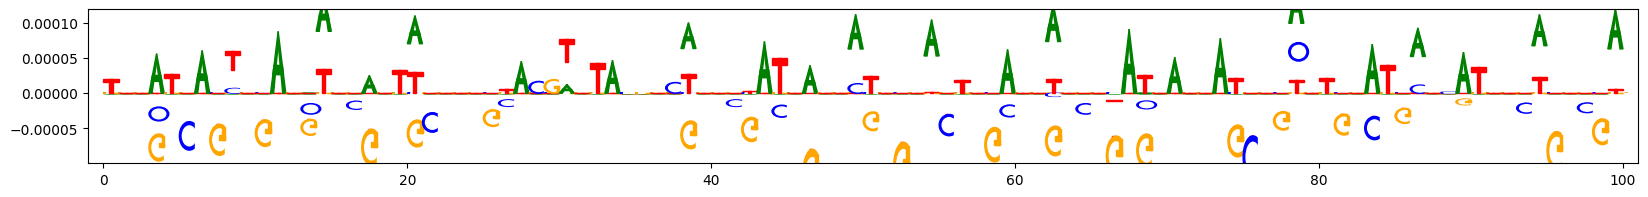

Scores for example 1


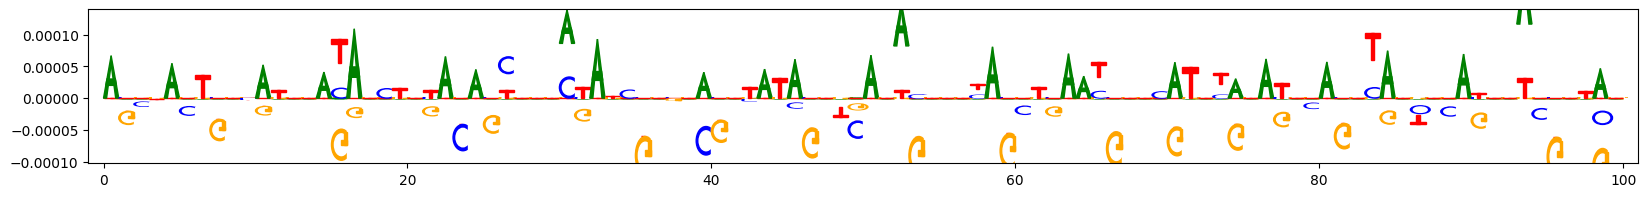

Scores for example 2


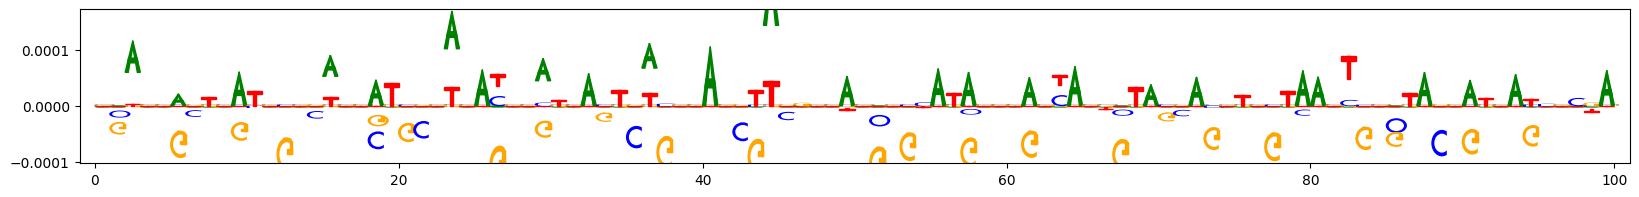

Scores for example 3


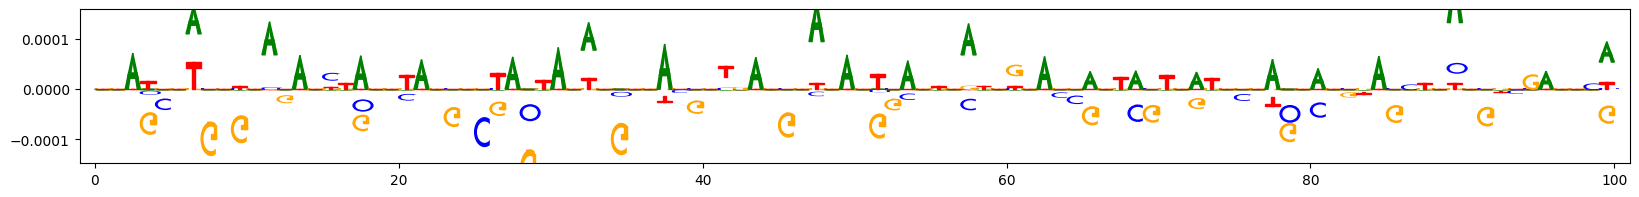

Scores for example 4


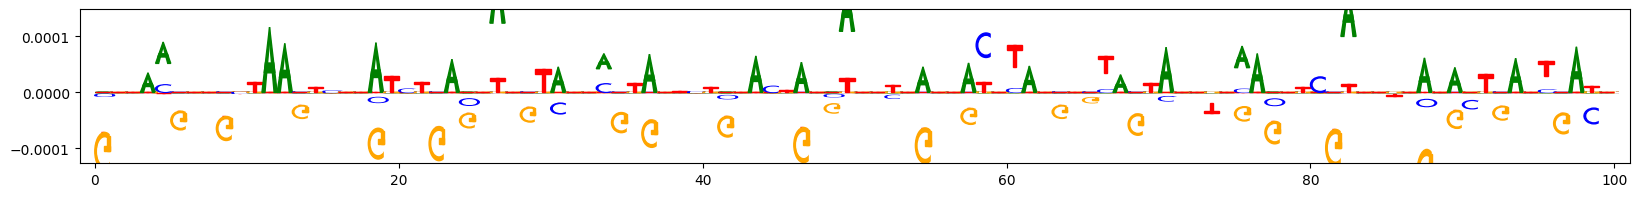

In [98]:

for idx, dinuc_shuff_explanation in enumerate(proj_score):
    print("Scores for example", idx)

    viz_sequence.plot_weights(
        dinuc_shuff_explanation[:,1000:1100], subticks_frequency=20,
    )

# Look at training loss with different lr

In [10]:
import math
math.log(1024)

6.931471805599453

In [17]:
pkl_files

['../results/train_loss/train_MNLL_5e-3.pkl',
 '../results/train_loss/train_MNLL_5e-4.pkl',
 '../results/train_loss/train_loss_1e-2.pkl',
 '../results/train_loss/train_loss_1e-3.pkl',
 '../results/train_loss/train_loss_5e-3.pkl',
 '../results/train_loss/train_MNLL_1e-2.pkl',
 '../results/train_loss/train_MNLL_1e-3.pkl',
 '../results/train_loss/train_loss_5e-4.pkl',
 '../results/train_loss/train_MSE_5e-3.pkl',
 '../results/train_loss/train_MSE_5e-4.pkl',
 '../results/train_loss/count_train_loss_1e-4.pkl',
 '../results/train_loss/train_MSE_1e-3.pkl',
 '../results/train_loss/train_MSE_1e-2.pkl']

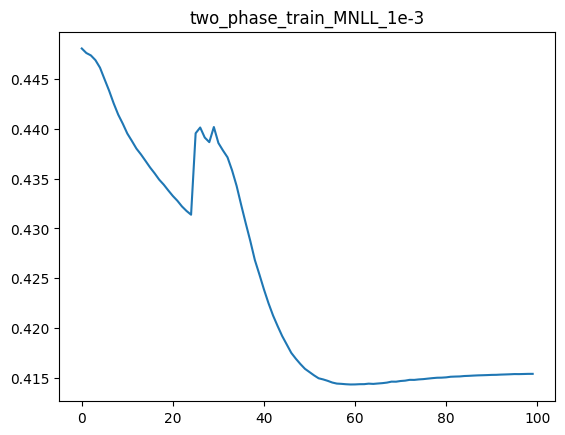

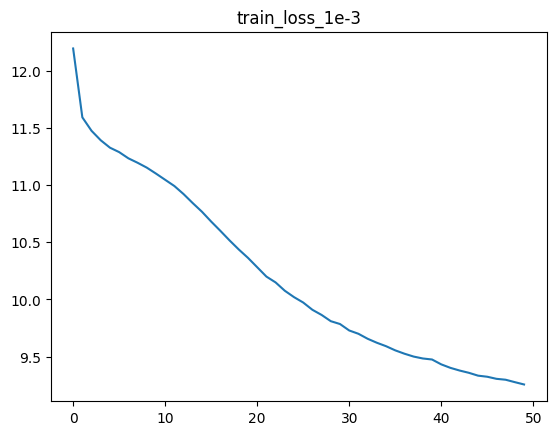

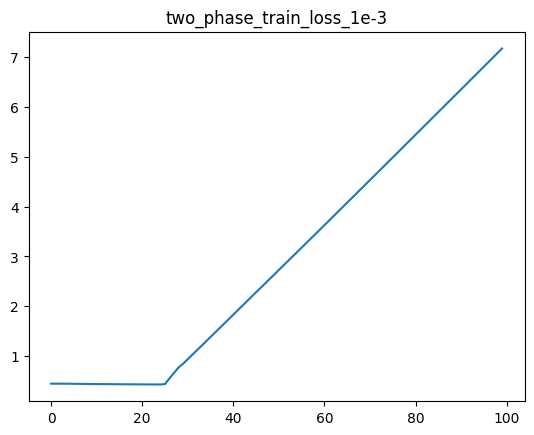

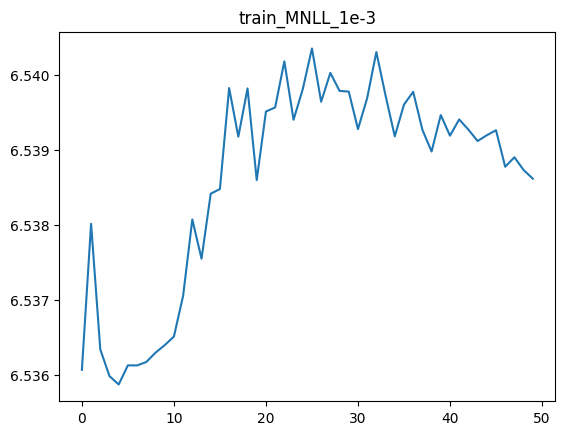

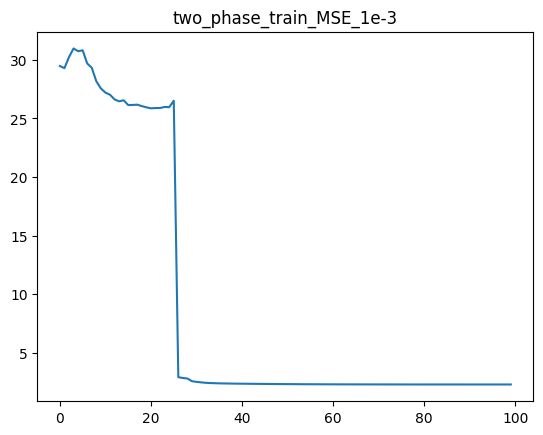

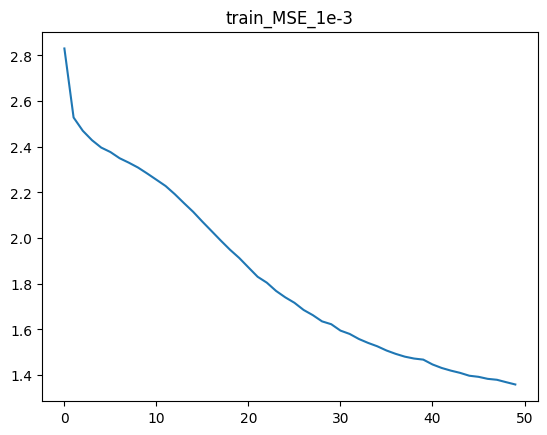

In [4]:
import glob
import pickle
import matplotlib.pyplot as plt

pkl_files = glob.glob('../results/train_loss/*1e-3.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()


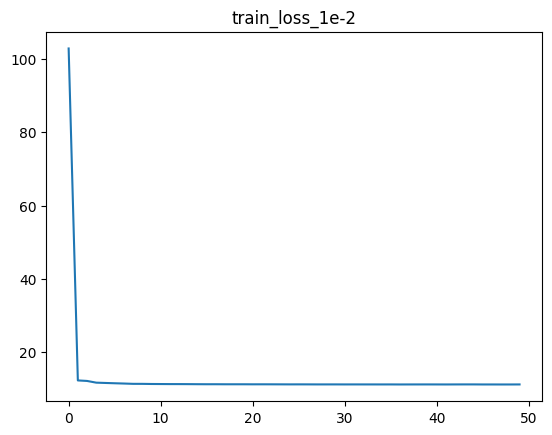

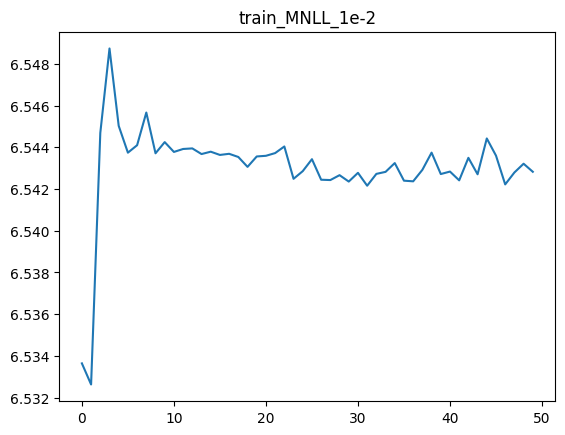

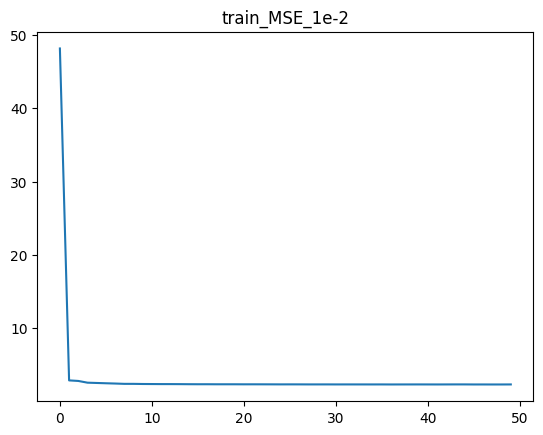

In [20]:
pkl_files = glob.glob('../results/train_loss/*1e-2.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()

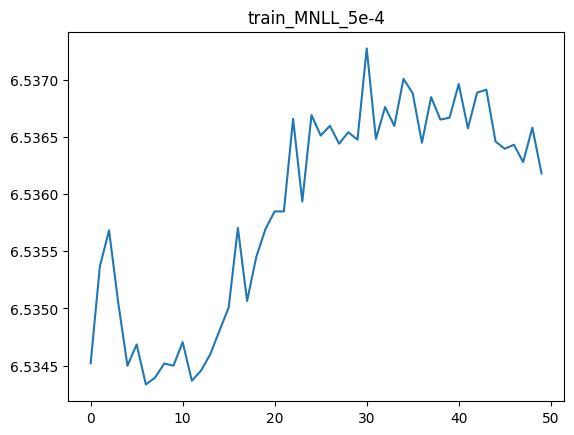

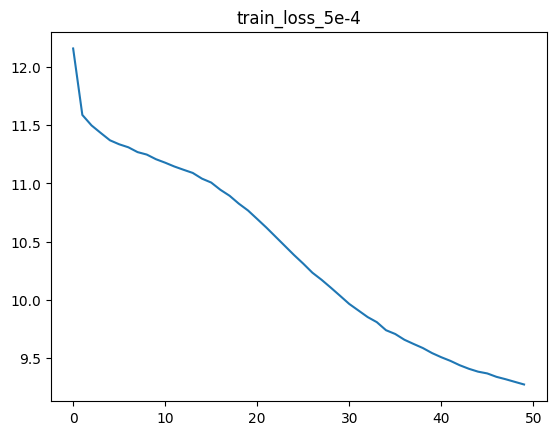

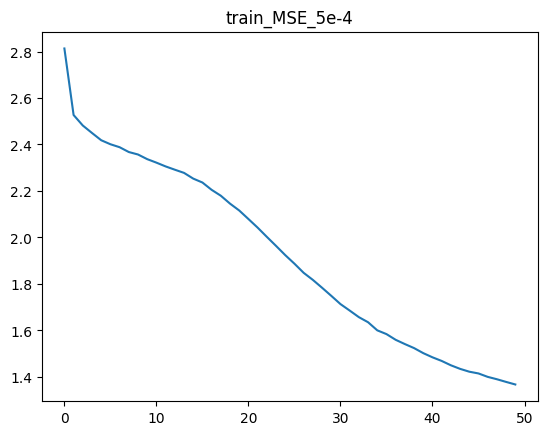

In [21]:
pkl_files = glob.glob('../results/train_loss/*5e-4.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()

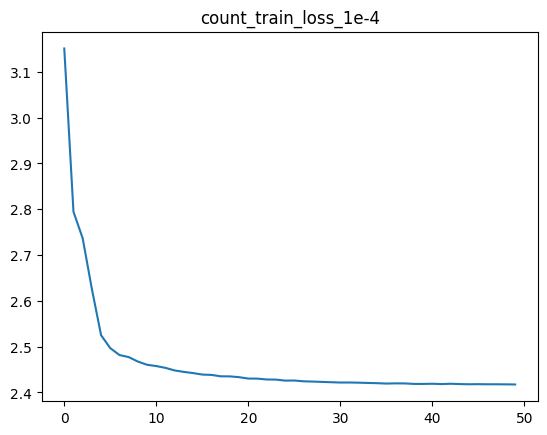

In [19]:
pkl_files = glob.glob('../results/train_loss/*1e-4.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()

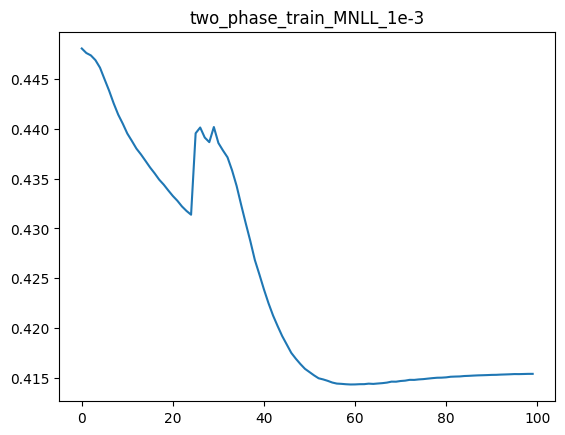

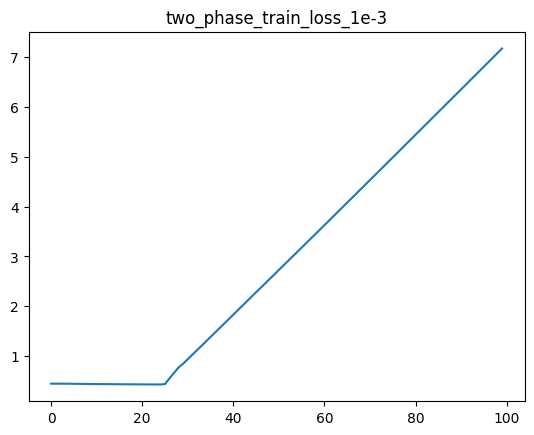

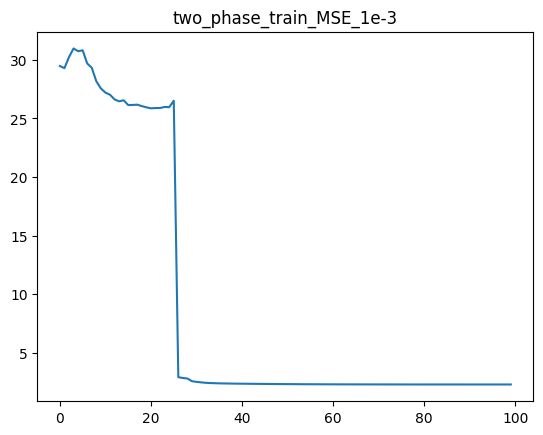

In [5]:

pkl_files = glob.glob('../results/train_loss/two_phase_*.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()

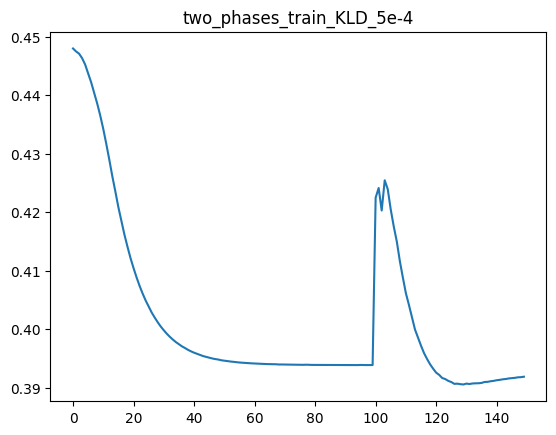

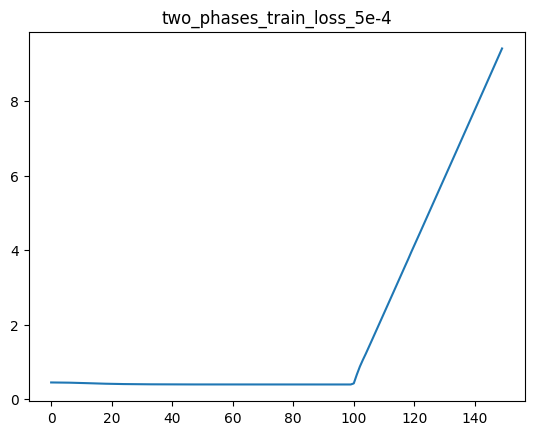

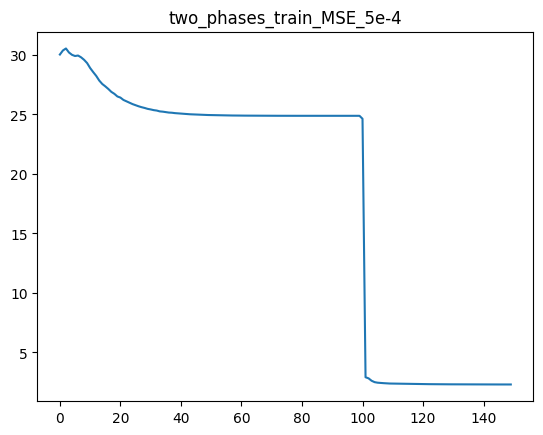

In [11]:
pkl_files = glob.glob('../results/train_loss/two_phases_*5e-4.pkl')

for f in pkl_files:
    with open(f, 'rb') as file:
        loss = pickle.load(file)

        plt.plot(loss)
        plt.title(f[22:-4])
        plt.show()